**NAME:** Rishabh Mathur

**DOMAIN:** Natural Language Processing

**BATCH:** MIP NLP - 03

# **Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing Dataset**

In [2]:
df = pd.read_csv('/content/emails.csv')

In [3]:
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.sample(5)

,text,spam
4514,"Subject: e - commerce conference at berkeley ,...",0
2104,Subject: praca dyplomowa niniejszym potwierdz...,0
2594,Subject: super saturday - dinner participation...,0
1597,Subject: re : var and credit meeting on wednes...,0
5499,"Subject: follow up mark , over the past seve...",0


In [5]:
df.shape

(5728, 2)

## We'll perform the following tasks as next steps:-
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement

# **1. Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
# Missing values.
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
# Duplicated Values
df.duplicated().sum()

33

In [9]:
# Removing duplicates
df.drop_duplicates(keep = 'first')

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
df.shape

(5728, 2)

# **2. EDA**

In [11]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [12]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

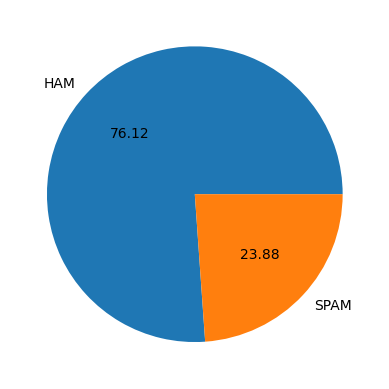

In [13]:
plt.pie(df['spam'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f")
plt.show()

**Therefore, we can clearly see that the data is imbalanced.**

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df['Num Of Char(s)'] = df['text'].apply(len)

In [17]:
df.head()

,text,spam,Num Of Char(s)
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [18]:
df['Num Of Words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df.head()

,text,spam,Num Of Char(s),Num Of Words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [20]:
df['Num Of Sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,text,spam,Num Of Char(s),Num Of Words,Num Of Sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [22]:
df[['Num Of Char(s)', 'Num Of Words', 'Num Of Sentences']].describe()

,Num Of Char(s),Num Of Words,Num Of Sentences
count,5728.000000,5728.000000,5728.000000
mean,1556.768680,327.982542,19.483240
std,2042.649812,418.833125,35.936051
min,13.000000,3.000000,1.000000
25%,508.750000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1894.250000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [23]:
# Not Spam.

df[df['spam'] == 0][['Num Of Char(s)', 'Num Of Words', 'Num Of Sentences']].describe()

,Num Of Char(s),Num Of Words,Num Of Sentences
count,4360.000000,4360.000000,4360.000000
mean,1631.918119,346.835321,19.862615
std,1959.664549,406.228875,38.051542
min,13.000000,3.000000,1.000000
25%,577.750000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.250000,440.250000,22.000000
max,43952.000000,8479.000000,1565.000000


In [24]:
# Spam
df[df['spam'] == 1][['Num Of Char(s)', 'Num Of Words', 'Num Of Sentences']].describe()

,Num Of Char(s),Num Of Words,Num Of Sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [25]:
import seaborn as sns

<Axes: xlabel='Num Of Char(s)', ylabel='Count'>

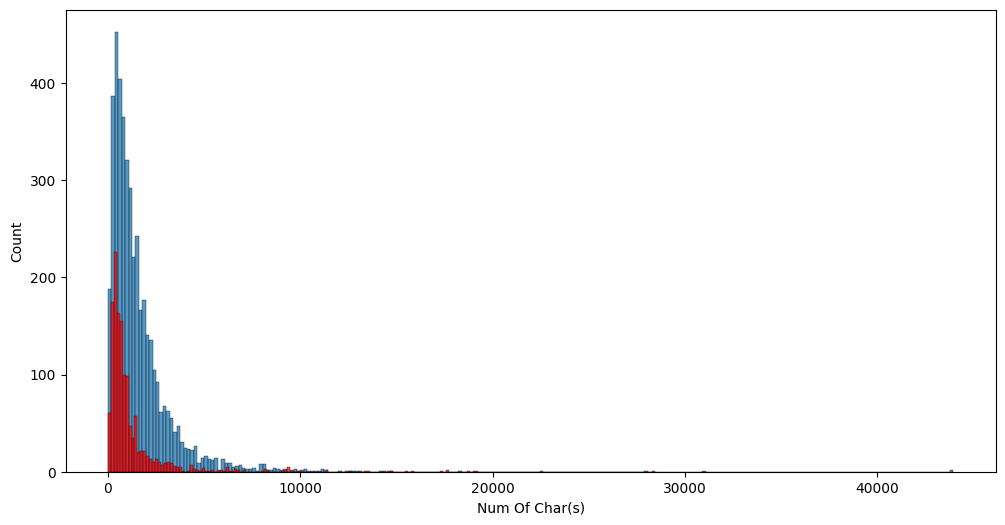

In [26]:
# Plotting the num of chars distribution using a histogram.
plt.figure(figsize=(12, 6))

sns.histplot(df[df['spam'] == 0]['Num Of Char(s)'])
sns.histplot(df[df['spam'] == 1]['Num Of Char(s)'], color = 'red')

<Axes: xlabel='Num Of Words', ylabel='Count'>

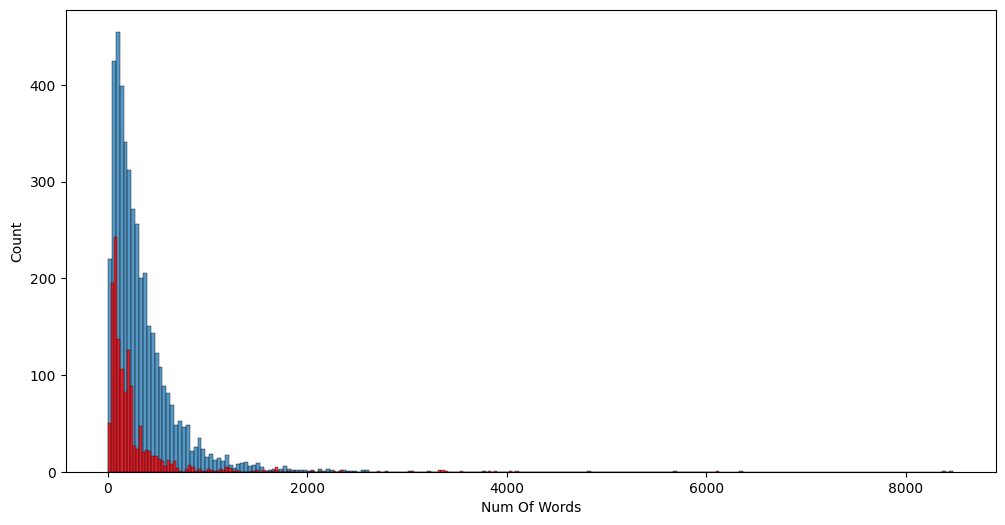

In [27]:
# Plotting the num of chars distribution using a histogram.
plt.figure(figsize=(12, 6))

sns.histplot(df[df['spam'] == 0]['Num Of Words'])
sns.histplot(df[df['spam'] == 1]['Num Of Words'], color = 'red')

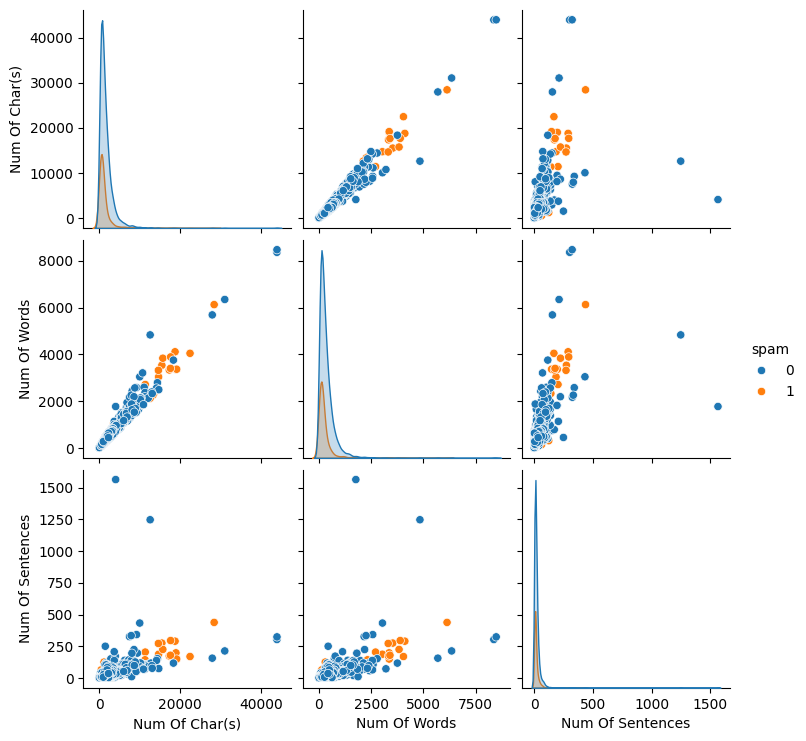

In [28]:
sns.pairplot(df, hue='spam')

<ipython-input-29-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

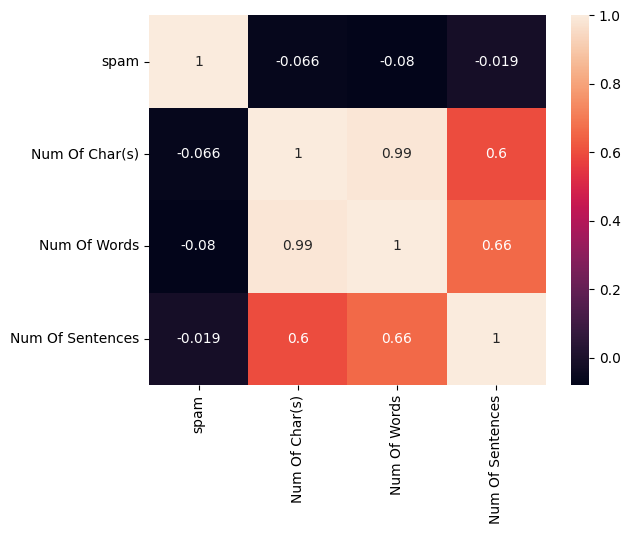

In [29]:
sns.heatmap(df.corr(), annot=True)

# **3. Text Preprocessing**

1. Lower case

2. Tokenization

3. Removing special characters

4. Removing stop words and punctuation

5. Stemming

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [32]:
ps = PorterStemmer()

In [33]:
def transform_text(text):
  # Lowercase
  text = text.lower()

  # Tokenize
  text = nltk.word_tokenize(text)

  # Removing special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Removing stopwords and punctuations
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # Stemming
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,text,spam,Num Of Char(s),Num Of Words,Num Of Sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [36]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate( df[df['spam'] == 1]['transformed_text'].str.cat(sep=" ") )

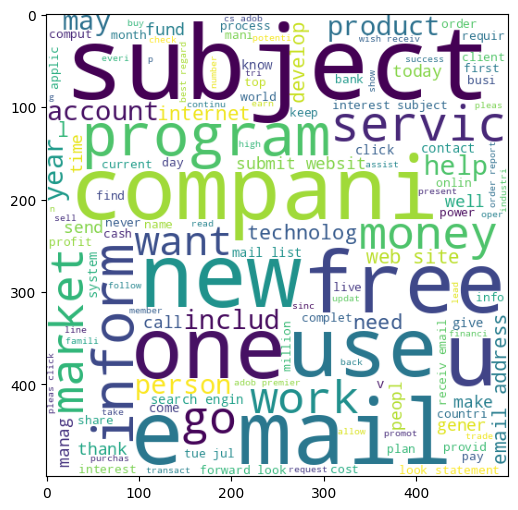

In [38]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

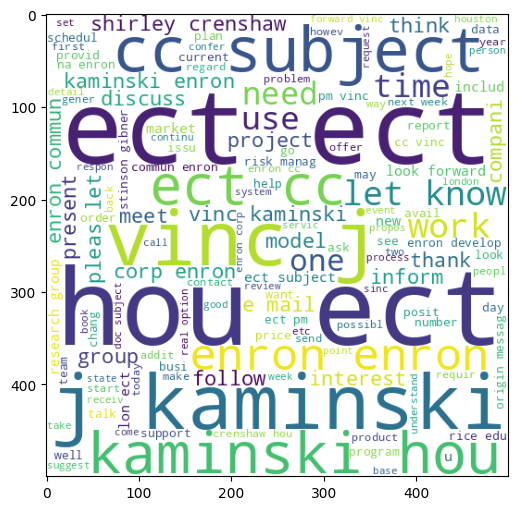

In [39]:
ham_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [40]:
df.head(10)

,text,spam,Num Of Char(s),Num Of Words,Num Of Sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...
5,"Subject: great nnews hello , welcome to medzo...",1,478,85,3,subject great nnew hello welcom medzonlin sh g...
6,Subject: here ' s a hot play in motion homela...,1,9340,1704,72,subject hot play motion homeland secur invest ...
7,Subject: save your money buy getting this thin...,1,446,97,9,subject save money buy get thing tri ciall yet...
8,Subject: undeliverable : home based business f...,1,507,122,3,subject undeliver home base busi grownup messa...
9,Subject: save your money buy getting this thin...,1,446,97,9,subject save money buy get thing tri ciall yet...


In [41]:
spam_corpus = []

for msg in df[df['spam']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [42]:
len(spam_corpus)

174630

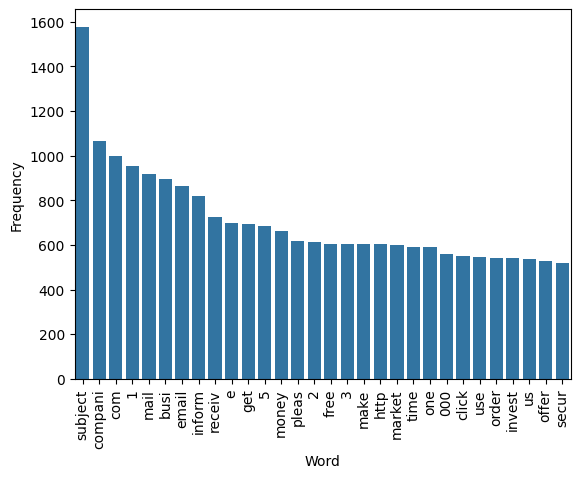

In [43]:
from collections import Counter

word_counter = Counter(spam_corpus)
most_common_words = word_counter.most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []

for msg in df[df['spam'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [45]:
len(ham_corpus)

707311

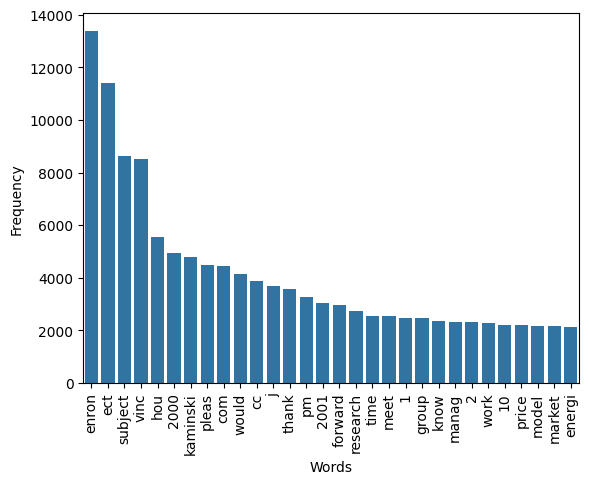

In [46]:
word_counter = Counter(ham_corpus)
most_common_words = word_counter.most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['Words', 'Frequency'])
sns.barplot(x='Words', y='Frequency', data=df_most_common)
plt.xticks(rotation = 'vertical')
plt.show()

# **4. Model Building**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5728, 3000)

In [50]:
y = df['spam'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9581151832460733
[[855   7]
 [ 41 243]]
0.972


In [56]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9851657940663177
[[858   4]
 [ 13 271]]
0.9854545454545455


In [57]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9485165794066318
[[805  57]
 [  2 282]]
0.831858407079646


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9912739965095986, 0.9928057553956835)

# **5. Evaluation**

In [62]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9912739965095986
Precision -  0.9928057553956835
For  KN
Accuracy -  0.9773123909249564
Precision -  0.9777777777777777
For  NB
Accuracy -  0.9851657940663177
Precision -  0.9854545454545455
For  DT
Accuracy -  0.9118673647469459
Precision -  0.7731343283582089
For  LR
Accuracy -  0.9729493891797557
Precision -  0.9809885931558935
For  RF
Accuracy -  0.9738219895287958
Precision -  0.9810606060606061
For  AdaBoost
Accuracy -  0.9712041884816754
Precision -  0.966542750929368
For  BgC
Accuracy -  0.9642233856893543
Precision -  0.9418181818181818
For  ETC
Accuracy -  0.9842931937172775
Precision -  0.996268656716418
For  GBDT
Accuracy -  0.9554973821989529
Precision -  0.953307392996109
For  xgb
Accuracy -  0.9869109947643979
Precision -  0.9653979238754326


In [63]:
performance_df = pd.DataFrame(
    {'Algorithm':clfs.keys(),
     'Accuracy':accuracy_scores,
     'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [64]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.984293,0.996269
0,SVC,0.991274,0.992806
2,NB,0.985166,0.985455
5,RF,0.973822,0.981061
4,LR,0.972949,0.980989
1,KN,0.977312,0.977778
6,AdaBoost,0.971204,0.966543
10,xgb,0.986911,0.965398
9,GBDT,0.955497,0.953307
7,BgC,0.964223,0.941818


In [65]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.984293
1,SVC,Accuracy,0.991274
2,NB,Accuracy,0.985166
3,RF,Accuracy,0.973822
4,LR,Accuracy,0.972949
5,KN,Accuracy,0.977312
6,AdaBoost,Accuracy,0.971204
7,xgb,Accuracy,0.986911
8,GBDT,Accuracy,0.955497
9,BgC,Accuracy,0.964223


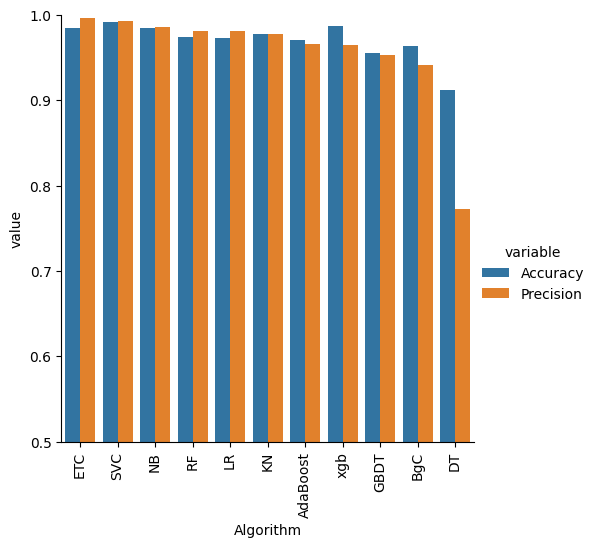

In [66]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# **6. Model Improvement**

Chnage value of "Max_features" in tfidf to improve the accuracy and precision

In [74]:
tfidf = TfidfVectorizer(max_features=4000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['spam'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9895287958115183
Precision -  0.9892086330935251
For  KN
Accuracy -  0.974694589877836
Precision -  0.967032967032967
For  NB
Accuracy -  0.981675392670157
Precision -  0.9888475836431226
For  DT
Accuracy -  0.9136125654450262
Precision -  0.7744807121661721
For  LR
Accuracy -  0.9720767888307156
Precision -  0.9772727272727273
For  RF
Accuracy -  0.9790575916230366
Precision -  0.9850746268656716
For  AdaBoost
Accuracy -  0.9677137870855148
Precision -  0.9022801302931596
For  BgC
Accuracy -  0.962478184991274
Precision -  0.9350180505415162
For  ETC
Accuracy -  0.9851657940663177
Precision -  0.9962825278810409
For  GBDT
Accuracy -  0.9528795811518325
Precision -  0.9457364341085271
For  xgb
Accuracy -  0.9834205933682374
Precision -  0.9553264604810997


In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [77]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [78]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [80]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.984293,0.996269,0.985166,0.996283,0.985166,0.996283,0.985166,0.996283
1,SVC,0.991274,0.992806,0.989529,0.989209,0.989529,0.989209,0.989529,0.989209
2,NB,0.985166,0.985455,0.981675,0.988848,0.981675,0.988848,0.981675,0.988848
3,RF,0.973822,0.981061,0.979058,0.985075,0.979058,0.985075,0.979058,0.985075
4,LR,0.972949,0.980989,0.972077,0.977273,0.972077,0.977273,0.972077,0.977273
5,KN,0.977312,0.977778,0.974695,0.967033,0.974695,0.967033,0.974695,0.967033
6,AdaBoost,0.971204,0.966543,0.967714,0.902280,0.967714,0.902280,0.967714,0.902280
7,xgb,0.986911,0.965398,0.983421,0.955326,0.983421,0.955326,0.983421,0.955326
8,GBDT,0.955497,0.953307,0.952880,0.945736,0.952880,0.945736,0.952880,0.945736
9,BgC,0.964223,0.941818,0.962478,0.935018,0.962478,0.935018,0.962478,0.935018
